In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')

In [64]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [65]:
# Remove rows from the sqft_basement column with a '?' entry (this removes 454 rows)
df = df[df.sqft_basement != '?']

# Convert the sqft_basement column to an int data type, need to convert to float first
df.sqft_basement = df.sqft_basement.astype(float).astype(int)

# Drop rows in the waterfront column with NAN entries
df.dropna(subset = ['waterfront'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18804 entries, 1 to 21596
Data columns (total 21 columns):
id               18804 non-null int64
date             18804 non-null object
price            18804 non-null float64
bedrooms         18804 non-null int64
bathrooms        18804 non-null float64
sqft_living      18804 non-null int64
sqft_lot         18804 non-null int64
floors           18804 non-null float64
waterfront       18804 non-null float64
view             18749 non-null float64
condition        18804 non-null int64
grade            18804 non-null int64
sqft_above       18804 non-null int64
sqft_basement    18804 non-null int64
yr_built         18804 non-null int64
yr_renovated     15474 non-null float64
zipcode          18804 non-null int64
lat              18804 non-null float64
long             18804 non-null float64
sqft_living15    18804 non-null int64
sqft_lot15       18804 non-null int64
dtypes: float64(8), int64(12), object(1)
memory usage: 3.2+ MB


In [66]:
# Create a dataframe for variables used for the model

# Drop irrelevant columns
df_data = df.drop(columns=['id', 'date', 'view', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])

# Create a size_ratio column
df_data['size_ratio'] = df_data.sqft_living / df_data.sqft_lot

df_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,size_ratio
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400,1951,1991.0,98125,0.354874
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0,1933,NaN,98028,0.077000
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910,1965,0.0,98136,0.392000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0,1987,0.0,98074,0.207921
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530,2001,0.0,98053,0.053174


In [67]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18804 entries, 1 to 21596
Data columns (total 15 columns):
price            18804 non-null float64
bedrooms         18804 non-null int64
bathrooms        18804 non-null float64
sqft_living      18804 non-null int64
sqft_lot         18804 non-null int64
floors           18804 non-null float64
waterfront       18804 non-null float64
condition        18804 non-null int64
grade            18804 non-null int64
sqft_above       18804 non-null int64
sqft_basement    18804 non-null int64
yr_built         18804 non-null int64
yr_renovated     15474 non-null float64
zipcode          18804 non-null int64
size_ratio       18804 non-null float64
dtypes: float64(6), int64(9)
memory usage: 2.3 MB


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


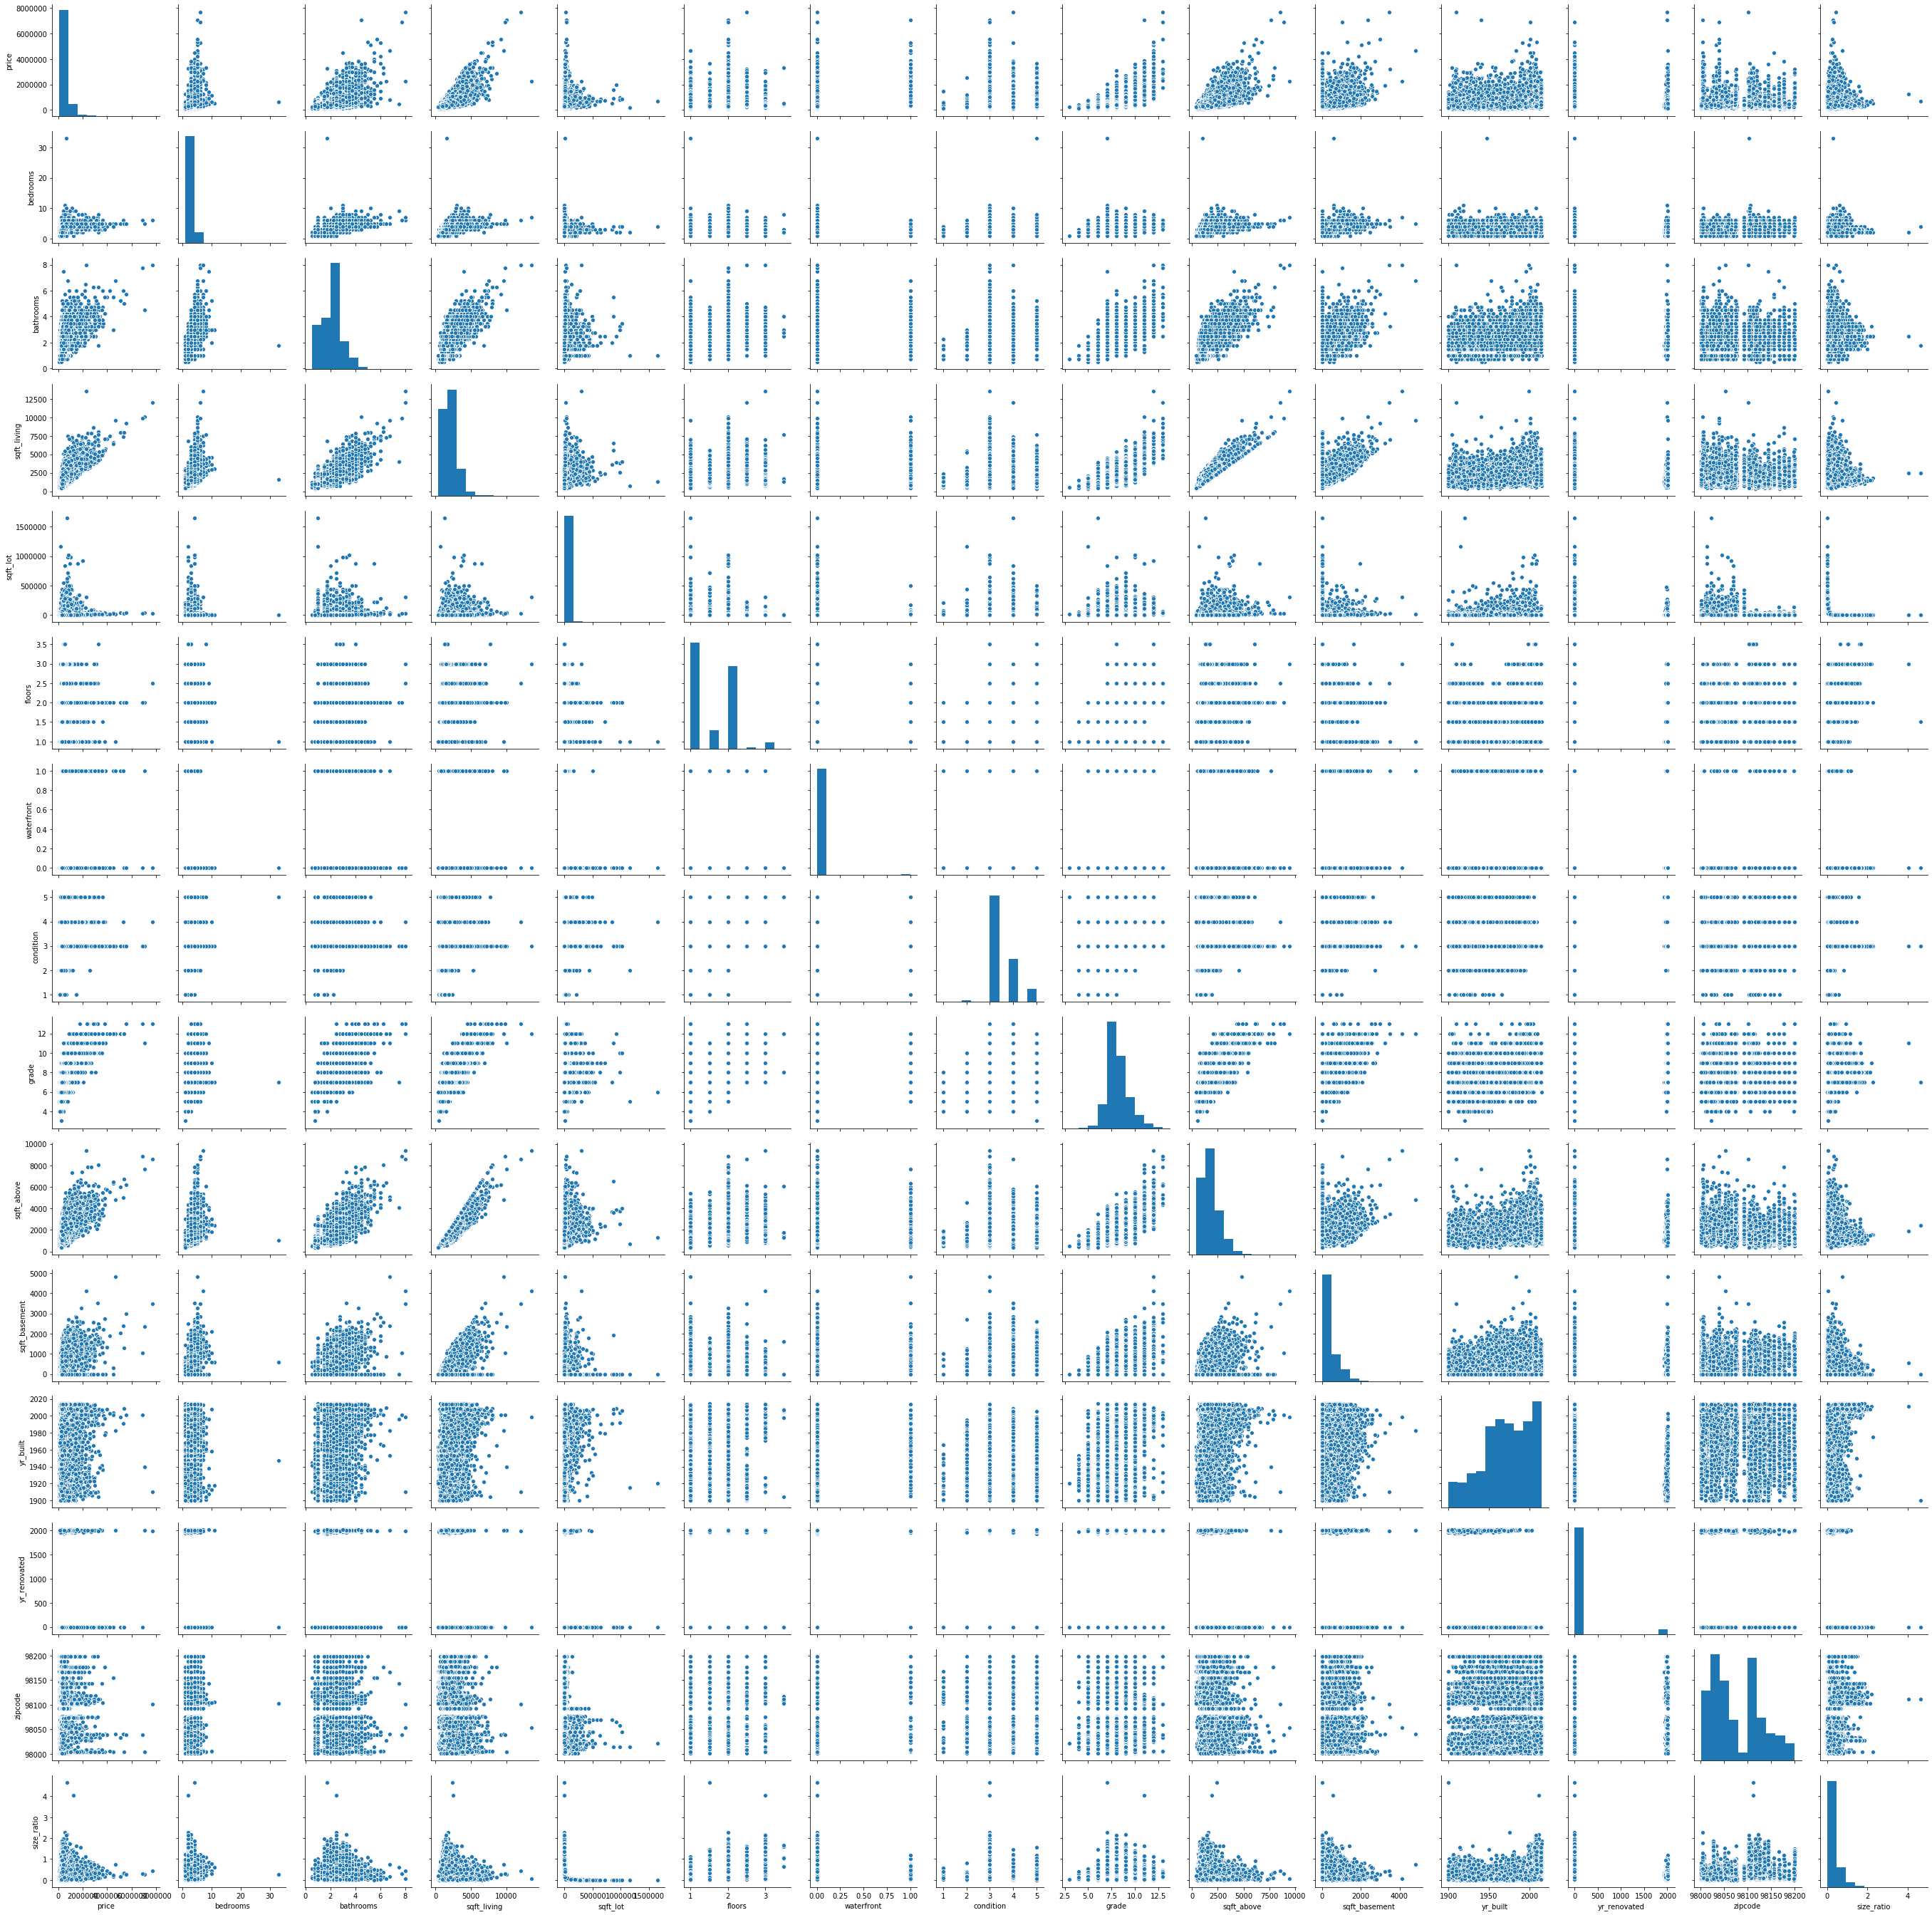

In [68]:
sns.pairplot(df_data)

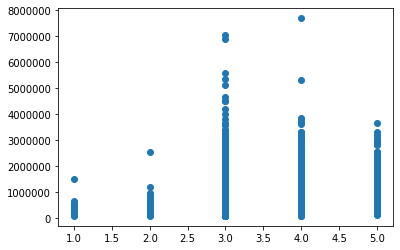

In [72]:
plt.scatter(df_data.condition, df_data.price)